In [1]:
try:
    # importing the libraries
    import pandas as pd
    import numpy as np

    import glob
    import os

    # for reading and displaying images
    from skimage.io import imread
    import matplotlib.pyplot as plt
    %matplotlib inline

    # for creating validation set
    from sklearn.model_selection import train_test_split

    # for evaluating the model
    from sklearn.metrics import accuracy_score
    from tqdm import tqdm

    # PyTorch libraries and modules
    import torch
    from torch.autograd import Variable
    from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
    from torch.optim import Adam, SGD

    import torchvision
except Exception as error:
    !pip install {str(error)[17:-1]}
except:
    !pip install scikit-image
    print("Pacote não encontrado")

In [2]:
lesions = {0: "Basal Cell Carcinoma", 
    1: "Lentigo",
    2: "Malignant Melanoma", 
    3: "Melanocytic naevus",
    4: "seborrhoeic keratosis",
    5: "Wart", 
    6: "Actinic Keratosis",
    7: "Squamous Cell Carcinoma",
    8: "Intraepithelial Carcinoma", 
    9: "Pyogenic Granuloma",
    10: "Haemangioma",
    11: "Dermatofibroma"
}

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,Unnamed: 0,id,label
0,0,37,5
1,1,14,5
2,2,28,5
3,3,16,5
4,4,29,5


In [4]:
train_img = []
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)


for index, row in tqdm(df_train.iterrows()):
    # defining the image path
    try:
        if int(row['id']) or row['id'] == str(0):
            image_path = 'dataset-split/train/' + lesions[row['label']] + "/" + str(row['id']) + '.png'
    except:
        image_path = 'dataset-split/train/'+ lesions[row['label']] + "/resnet_augmented/" + str(row['id']) + '.png'
    # reading the image
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)
    

# converting the list to numpy array
train_x = np.array(train_img)
# defining the target
train_y = train['label'].values
train_x.shape

53820it [00:48, 1106.38it/s]


(53820, 128, 128)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f35f3782850>)

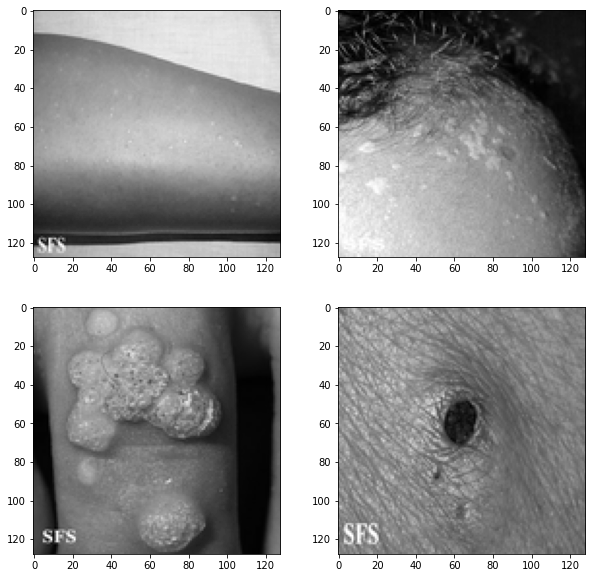

In [5]:
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')

In [6]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

In [ ]:
train_x.shape